<a href="https://colab.research.google.com/github/yuriborg/time_series/blob/main/Air_Passengers_Monthly_Milk_Darts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1]:
!pip install darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 817.6/817.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 19.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.4/110.4 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.7/777.7 kB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.8/279.8 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.2/169.2

In [27]:
import pandas as pd
import numpy as np
from darts import TimeSeries
from darts.datasets import AirPassengersDataset, MonthlyMilkDataset

# Example 1

## Data Extraction

In [28]:
# Loading Dataset as Data-Array
air_series = AirPassengersDataset().load()
milk_series = MonthlyMilkDataset().load()

In [3]:
series = AirPassengersDataset().load()
len(series)

144

## EDA

<Axes: xlabel='Month'>

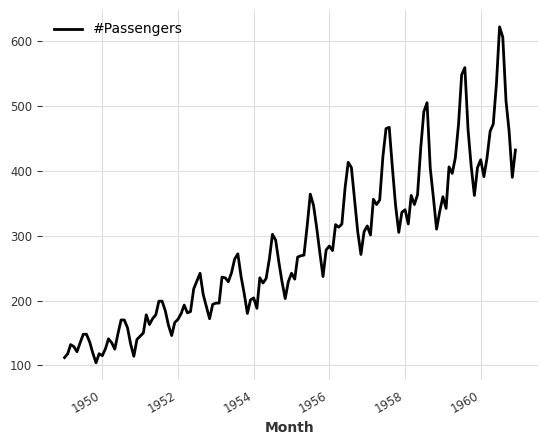

In [4]:
series.plot()

## Avaiable Operations

<Axes: xlabel='Month'>

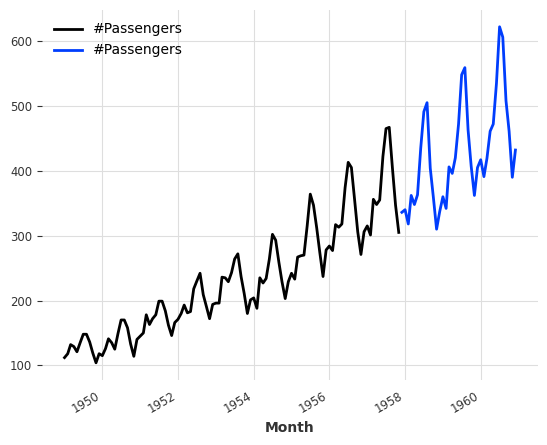

In [5]:
series1, series2 = series.split_before(0.75)

series1.plot()
series2.plot()

<Axes: xlabel='Month'>

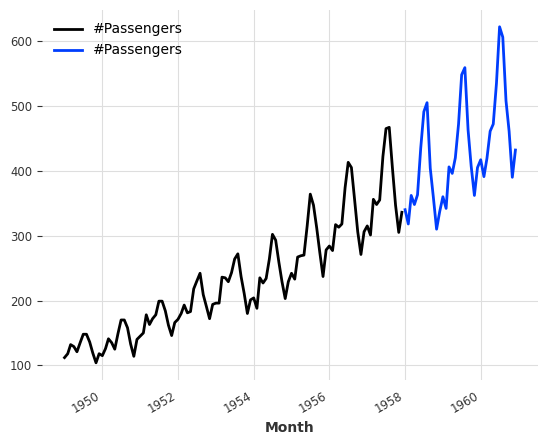

In [6]:
series1, series2 = series.split_after(0.75)

series1.plot()
series2.plot()

<Axes: xlabel='Month'>

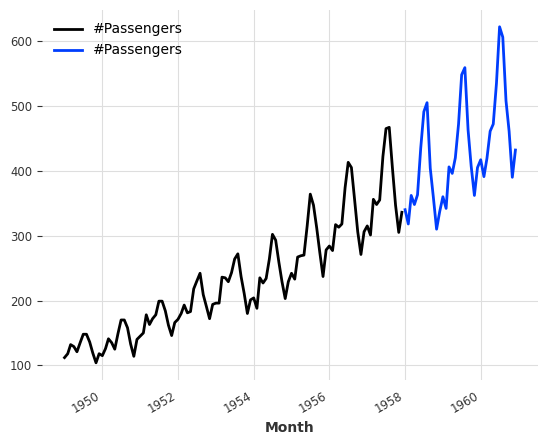

In [7]:
series1, series2 = series[:-36], series[-36:]
series1.plot()
series2.plot()

<Axes: xlabel='Month'>

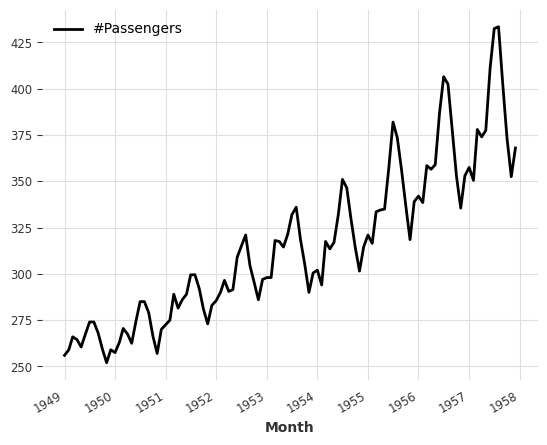

In [8]:
(series1 / 2 + (20 * 10)).plot()

<Axes: xlabel='Month'>

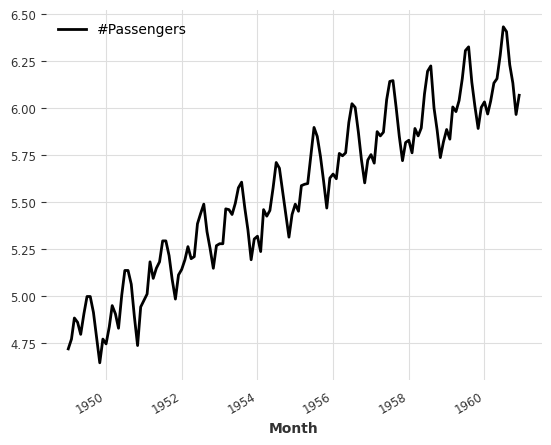

In [9]:
import numpy as np
series.map(np.log).plot()

<Axes: xlabel='Month'>

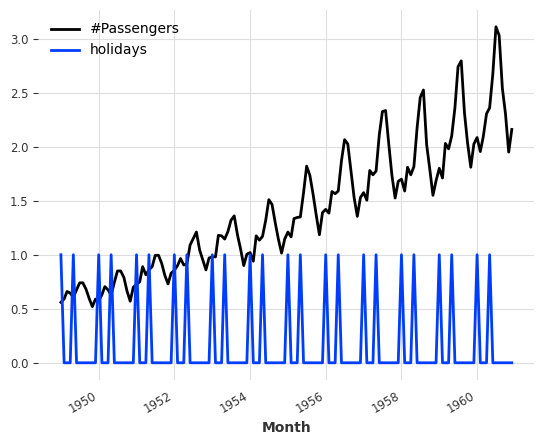

In [10]:
(series / 200).add_holidays("BR").plot()

## Missing Values

<Axes: xlabel='time'>

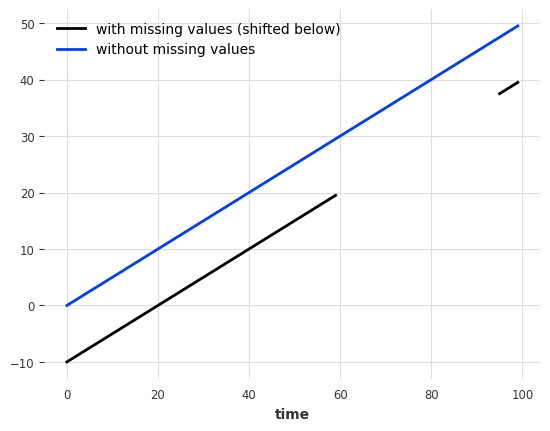

In [11]:
from darts.utils.missing_values import fill_missing_values

values = np.arange(0, 50, 0.5)
values[30:30] = np.nan
values[60:95] = np.nan

series_ = TimeSeries.from_values(values)

(series_ - 10).plot(label='with missing values (shifted below)')
fill_missing_values(series_).plot(label='without missing values')

## Train Test Split

<Axes: xlabel='Month'>

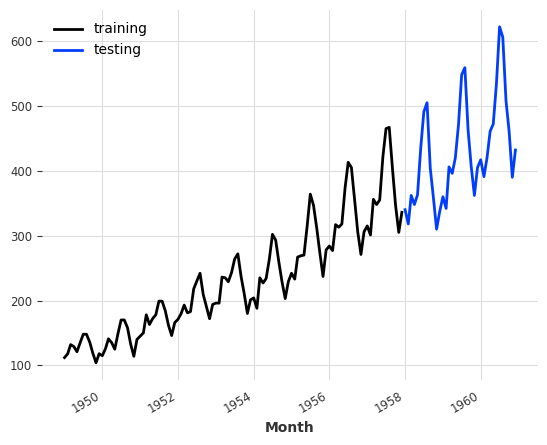

In [12]:
train, test = series.split_before(pd.Timestamp("19580101"))
train.plot(label="training")
test.plot(label="testing")

## Forecasting

<Axes: xlabel='Month'>

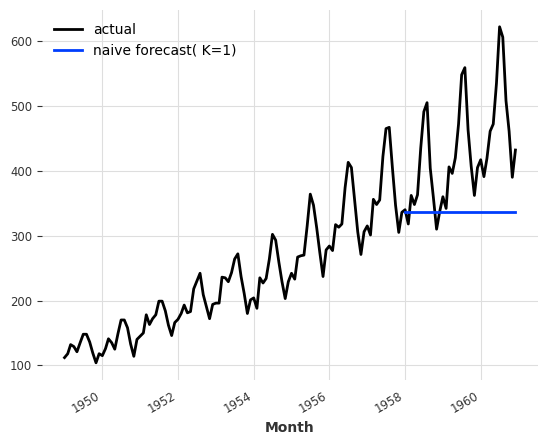

In [13]:
from darts.models import NaiveSeasonal

naive_model = NaiveSeasonal(K=1)
naive_model.fit(train)
naive_forecast = naive_model.predict(36)

series.plot(label="actual")
naive_forecast.plot(label='naive forecast( K=1)')

## Inspect Seasonality

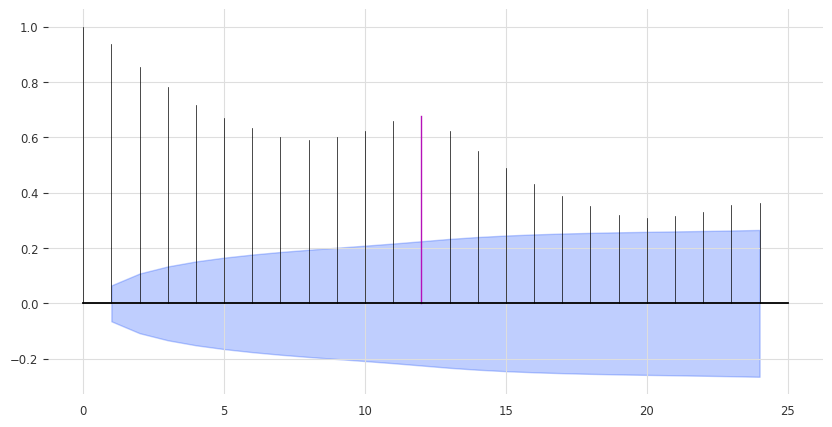

In [19]:
from darts.utils.statistics import plot_acf, check_seasonality
plot_acf(train, m=12, alpha=0.5)

  - There is a spike at x = 12, which represents the yearly seasonality trend (red line).

  - Now we will re-run our Naïve Seasonal model but with k = 12 (the value that we have identified earlier)

<Axes: xlabel='Month'>

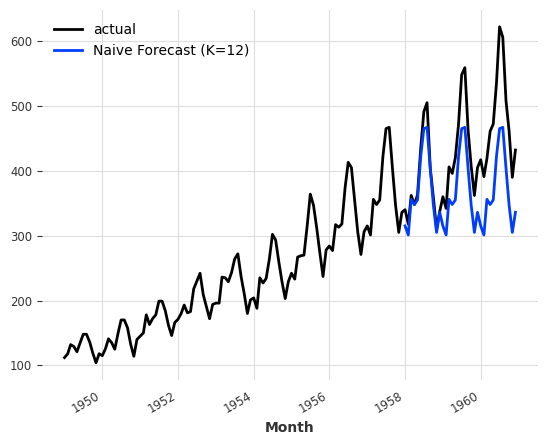

In [21]:
seasonal_model = NaiveSeasonal(K=12)
seasonal_model.fit(train)
seasonal_forecast = seasonal_model.predict(36)

series.plot(label='actual')
seasonal_forecast.plot(label='Naive Forecast (K=12)')


## Evaluating model

In [26]:
print(map(series, seasonal_forecast))

# Example 2

## EDA

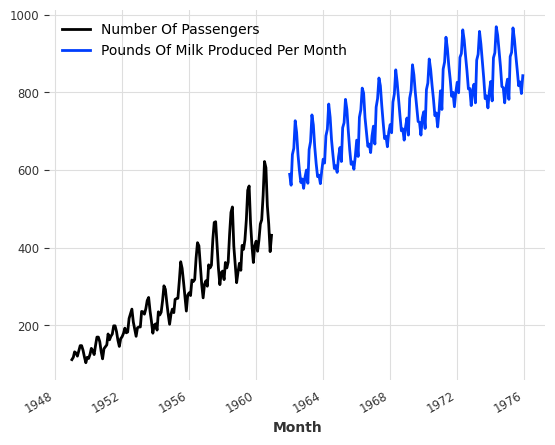

In [30]:
#plot chart
import matplotlib.pyplot as plt

air_series.plot(label="Number Of Passengers")
milk_series.plot(label="Pounds Of Milk Produced Per Month" )
plt.legend();

## Feature Engineering

### Scaling

In [32]:
from darts.dataprocessing.transformers import Scaler

In [33]:
scaler_air, scaler_milk = Scaler(), Scaler()

In [36]:
air_series_scaled = scaler_air.fit_transform(air_series)
milk_series_scaled = scaler_milk.fit_transform(milk_series)

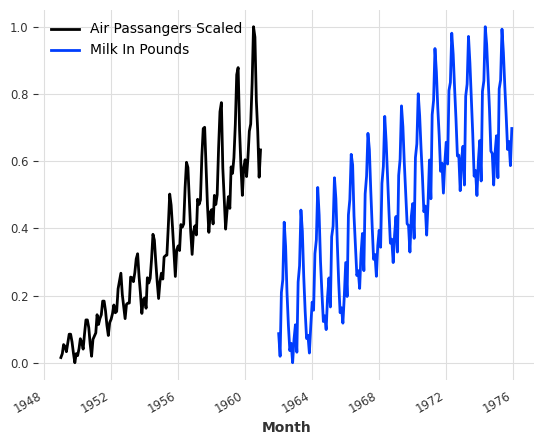

In [37]:
# plottingair_ds.plot(label="Number Of Passengers")
air_series_scaled.plot(label = "Air Passangers Scaled")
milk_series_scaled.plot(label = "Milk In Pounds")
plt.legend();

### Train Test Split

In [38]:
air_series_train,  air_series_val = air_series_scaled[:-36], air_series_scaled[-36:]
milk_series_train, milk_series_val = milk_series_scaled[:-36], milk_series_scaled[-36:]

## Model Fitting

In [40]:
from darts.models import NBEATSModel

In [41]:
model = NBEATSModel(input_chunk_length=24 , output_chunk_length=12, n_epochs = 100 , random_state = 15)

In [42]:
model.fit([air_series_train, milk_series_train], verbose = True)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
24.787    Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


NBEATSModel(generic_architecture=True, num_stacks=30, num_blocks=1, num_layers=4, layer_widths=256, expansion_coefficient_dim=5, trend_polynomial_degree=2, dropout=0.0, activation=ReLU, input_chunk_length=24, output_chunk_length=12, n_epochs=100, random_state=15)

## Model Prediction

In [43]:
pred_air = model.predict(n=36, series = air_series_train)
pred_milk = model.predict(n=36, series = milk_series_train)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

## Model Evaluation

In [46]:
from darts.metrics import mape
print("Mape = {:.2f}%".format(mape(air_series_scaled , pred_air)))
print("Mape = {:.2f}%".format(mape(milk_series_scaled , pred_milk)))

Mape = 9.47%
Mape = 23.76%


# Visualizing Results

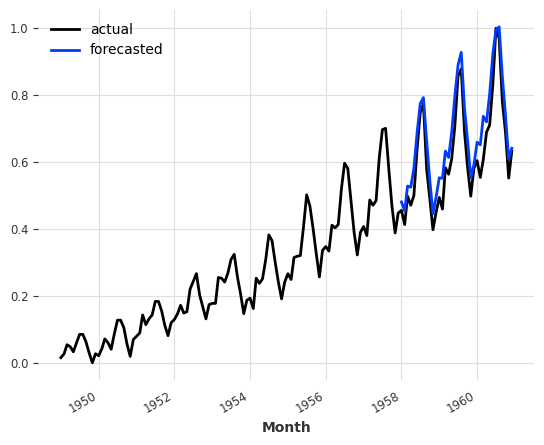

In [47]:
air_series_scaled.plot(label ='actual')
pred_air.plot(label='forecasted')
plt.legend()

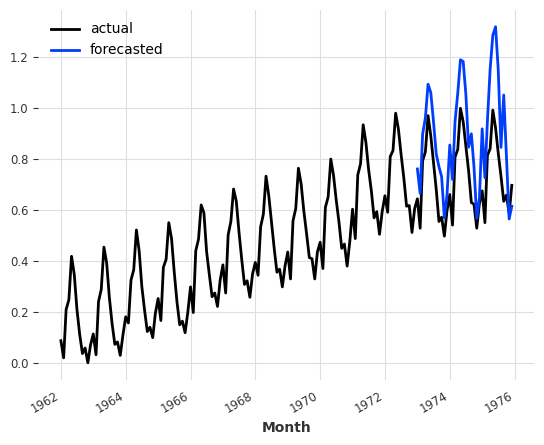

In [48]:
milk_series_scaled.plot(label='actual')
pred_milk.plot(label='forecasted')
plt.legend()